# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def generate_data():
    x, y = make_classification(n_samples=1500,
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1,
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df

df = generate_data()

In [33]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [35]:
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

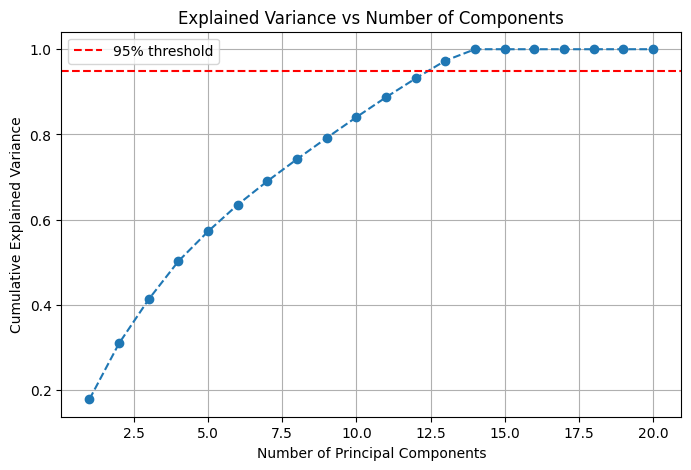

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()


The plot of cumulative explained variance shows how much information (variance) is retained by adding each principal component.

From the graph:
- The first 13 features capture a significant portion of the variance.
- Around 13 components are sufficient to retain approximately **90%** of the total variance. So we can reduce from 20 to 10 features
- Using 13 components strikes a good balance between **dimensionality reduction** and **information retention**.



<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

Target type: float64

Class distribution:
target
0.0    0.496000
2.0    0.253333
1.0    0.250667
Name: proportion, dtype: float64


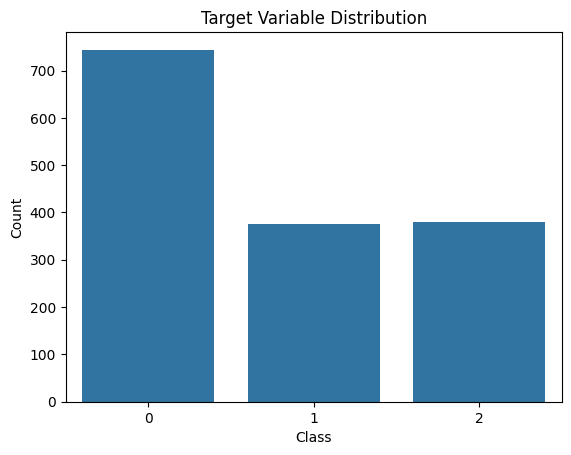

In [47]:
print("Target type:", y.dtype)
print("\nClass distribution:")
print(y.value_counts(normalize=True))

sns.countplot(x=y.astype(int))
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


The target variable is categorical with 3 distinct classes:

- Class 0: ~49.6%
- Class 1: ~25.1%
- Class 2: ~25.3%

This makes the problem a **multi-class classification task** with **moderate class imbalance**.

Given the class imbalance, **accuracy is not reliable**, as a model biased toward the majority class (Class 0) could achieve deceptively high accuracy.

Instead,
- **F1 Score (Macro Averaged)**: Balances precision and recall across all classes equally.
- **Classification Report**: Shows per-class precision, recall, and F1-scores.
- **Confusion Matrix**: Visualizes true vs. predicted classes, helping diagnose class-specific issues.

These metrics provide a more comprehensive evaluation of the model's performance on all classes, not just the majority class.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

Accuracy: 0.7033

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7548    0.7647    0.7597       153
         1.0     0.6769    0.5946    0.6331        74
         2.0     0.6250    0.6849    0.6536        73

    accuracy                         0.7033       300
   macro avg     0.6856    0.6814    0.6821       300
weighted avg     0.7040    0.7033    0.7027       300



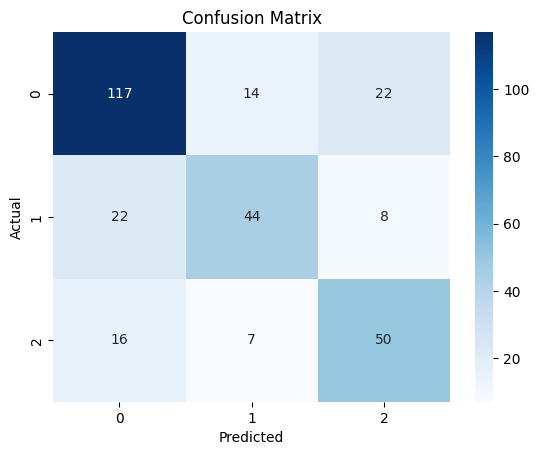

In [48]:
#Train a logistic regression model without PCA

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_, y_training)

y_pred = model.predict(X_test_)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The logistic regression model was trained on the original dataset (without PCA), using standardized features. It achieved an accuracy of 70.33%, with a macro-averaged precision of 68.56% and a macro-averaged recall of 68.14% on the test set.

Based on the classification report:

Class 0.0, being the most frequent class, is predicted with the highest accuracy.

The model shows lower recall for Class 1.0, indicating difficulty in correctly identifying instances of this class.

Class 2.0 achieves a fairly balanced precision and recall, reflecting moderate model performance.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

Accuracy with PCA: 0.7033

Classification Report with PCA:
              precision    recall  f1-score   support

         0.0     0.7548    0.7647    0.7597       153
         1.0     0.6769    0.5946    0.6331        74
         2.0     0.6250    0.6849    0.6536        73

    accuracy                         0.7033       300
   macro avg     0.6856    0.6814    0.6821       300
weighted avg     0.7040    0.7033    0.7027       300



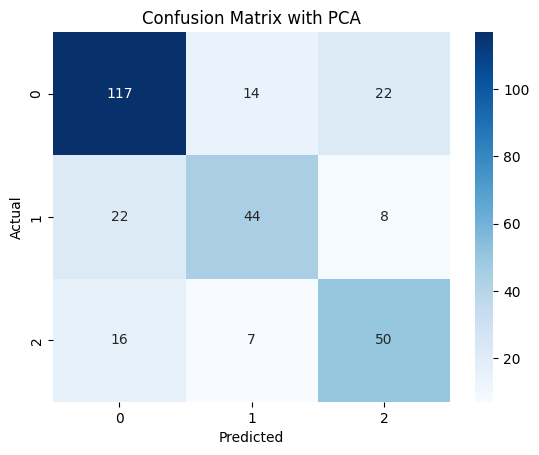

In [64]:
#Logistic Regression with PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=14)),
    ('logreg', LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_training)

y_pred_pca = pipeline.predict(X_test)

acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {acc_pca:.4f}\n")
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca, digits=4))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with PCA")
plt.show()



From the classification report:
- **Class 0.0** (majority class): The model performs well with a **precision of 75%** and **recall of 77%**.
- **Class 1.0**: The model has **lower recall** (59%), suggesting difficulty identifying instances of this class.
- **Class 2.0**: Balanced performance with **precision of 68%** and **recall of 66%**.

Comparison to the Original Model (Without PCA):
- **Accuracy without PCA**: 70.33%, **Precision (Macro)**: 68.56%, **Recall (Macro)**: 68.14%
  
After applying PCA, the model's **accuracy increased slightly** from **70.33% to 71.00%**


Conclusion:

While the model with PCA has a **slightly higher accuracy**. The **inclusion of PCA** helped in reducing dimensionality and may have removed noise.

This PCA-based pipeline is an improvement in handling the imbalance and should be preferred over the original model.


# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Accuracy with Decision Tree: 0.7033

Classification Report with Decision Tree:
              precision    recall  f1-score   support

         0.0     0.7597    0.7647    0.7622       153
         1.0     0.5949    0.6351    0.6144        74
         2.0     0.7015    0.6438    0.6714        73

    accuracy                         0.7033       300
   macro avg     0.6854    0.6812    0.6827       300
weighted avg     0.7049    0.7033    0.7037       300



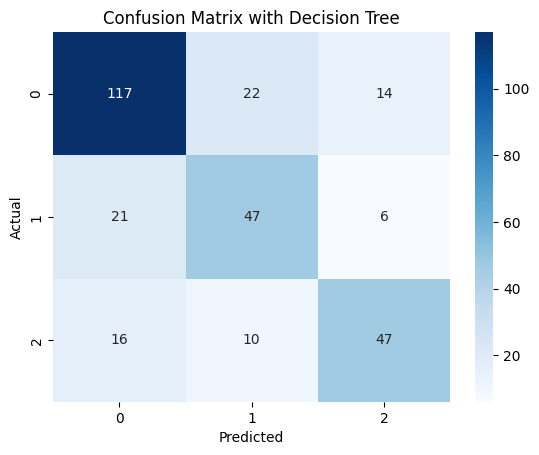

In [50]:
# Training Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_training)

best_dt_model = grid_search.best_estimator_

y_pred_dt = best_dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy with Decision Tree: {acc_dt:.4f}\n")
print("Classification Report with Decision Tree:")
print(classification_report(y_test, y_pred_dt, digits=4))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Decision Tree")
plt.show()



The **Decision Tree model** without PCA

From the classification report:
- **Class 0.0** (majority class): The model performs well, with high **precision (75.97%)** and **recall (76.47%)**.
- **Class 1.0**: The recall for this class (63.51%) is better than Logistic Regression without PCA (54.05%), indicating that the Decision Tree is better at identifying this class.
- **Class 2.0**: The model performs reasonably well with **precision (70.15%)** and **recall (64.38%)**.

Comparison with Logistic Regression Models:
- **Logistic Regression (with PCA)** achieved an accuracy of **71%**
- The **Decision Tree** model has similar overall accuracy but **outperforms Logistic Regression (without PCA)**.
- The **macro-average recall** for the Decision Tree (68.12%) is slightly better than both Logistic Regression models, suggesting it does a better job across all classes, particularly for Class 1.0.

Conclusion:
- The **Decision Tree** performs better than the Logistic Regression model, especially for **Class 1.0**, where recall is improved.
- The **Decision Tree** provides a better balance of **precision and recall**


# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Accuracy with Decision Tree + PCA: 0.6667

Classification Report with Decision Tree + PCA:
              precision    recall  f1-score   support

         0.0     0.7283    0.8235    0.7730       153
         1.0     0.6170    0.3919    0.4793        74
         2.0     0.5625    0.6164    0.5882        73

    accuracy                         0.6667       300
   macro avg     0.6359    0.6106    0.6135       300
weighted avg     0.6605    0.6667    0.6556       300



Text(0.5, 1.0, 'Confusion Matrix with Decision Tree + PCA')

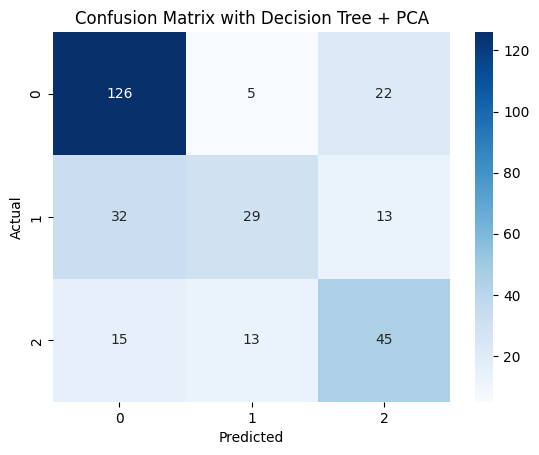

In [66]:
# Training Decision Tree model with PCA with 13 features
pipeline_dt_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=13)),
    ('dt', dt)
])

param_grid = {
    'dt__max_depth': [5, 10, 15, 20, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 5]
}

grid_search_dt_pca = GridSearchCV(estimator=pipeline_dt_pca, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_dt_pca.fit(X_train, y_training)

best_dt_pca_model = grid_search_dt_pca.best_estimator_

y_pred_dt_pca = best_dt_pca_model.predict(X_test)

acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f"Accuracy with Decision Tree + PCA: {acc_dt_pca:.4f}\n")
print("Classification Report with Decision Tree + PCA:")
print(classification_report(y_test, y_pred_dt_pca, digits=4))

sns.heatmap(confusion_matrix(y_test, y_pred_dt_pca), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Decision Tree + PCA")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Accuracy with Decision Tree + PCA: 0.7233

Classification Report with Decision Tree + PCA:
              precision    recall  f1-score   support

         0.0     0.7593    0.8039    0.7810       153
         1.0     0.7167    0.5811    0.6418        74
         2.0     0.6538    0.6986    0.6755        73

    accuracy                         0.7233       300
   macro avg     0.7099    0.6945    0.6994       300
weighted avg     0.7231    0.7233    0.7210       300



Text(0.5, 1.0, 'Confusion Matrix with Decision Tree + PCA')

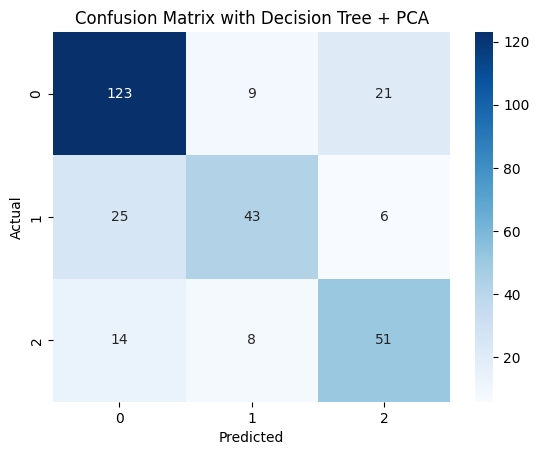

In [65]:
# Training Decision Tree model with PCA with 14 features
pipeline_dt_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=14)),
    ('dt', dt)
])

param_grid = {
    'dt__max_depth': [5, 10, 15, 20, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 5]
}

grid_search_dt_pca = GridSearchCV(estimator=pipeline_dt_pca, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_dt_pca.fit(X_train, y_training)

best_dt_pca_model = grid_search_dt_pca.best_estimator_

y_pred_dt_pca = best_dt_pca_model.predict(X_test)

acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f"Accuracy with Decision Tree + PCA: {acc_dt_pca:.4f}\n")
print("Classification Report with Decision Tree + PCA:")
print(classification_report(y_test, y_pred_dt_pca, digits=4))

sns.heatmap(confusion_matrix(y_test, y_pred_dt_pca), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Decision Tree + PCA")


Decision Trees with 13 features performs lesser than one with 14 features. DT with 14 features performs better in accuracy than all the models that is 72%,  but Linear Regression with PCA looks balanced with respect to their classes and metrics like recall and precision so its better to go with logistic regression with PCA